In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

In [2]:
from sklearn.preprocessing import StandardScaler, normalize
from dataprep.eda import plot, plot_correlation, create_report, plot_missing


In [3]:
data = pd.read_csv('marketing_campaign1.csv')
data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7             0   
1    8/3/2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3   10/2/2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5    9/9/2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7    8/5/2013       32        76  ...                  8             0   
8    6/6/2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

  0%|                                                                                         | 0/2975 [00:00<…


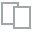
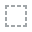
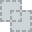
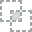
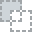
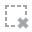
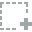
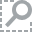
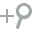
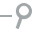
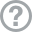
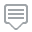
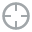
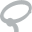
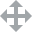
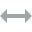
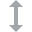
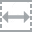
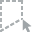
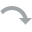
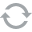
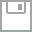
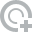
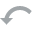
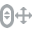
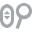
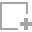
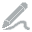
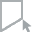
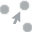
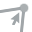
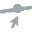

In [4]:
plot(data)

In [5]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

last_date = date(2021,9, 12)

data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

data['Education'] = data['Education'].replace({'Basic':'Basic','2n Cycle':'Postgraduate','Graduation':'Undergraduate','Master':'Postgraduate','PhD':'Postgraduate'})

data['Children'] = data['Kidhome']+ data['Teenhome']

data['Marital_Status'] = data['Marital_Status'].replace({'Alone':'Single', 'Absurd':'Single','YOLO': 'Single','Divorced':'Single','Widow':'Single','Married':'In Relationship', 'Together': 'In Relationship' })

data = data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

data['Age'] = 2021 - data['Year_Birth']

data['Days_Enrolled'] = pd.to_numeric(data['Dt_Customer'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

data = data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

data = data[['Age','Education','Marital_Status','Income','Spending','Days_Enrolled','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]

In [6]:
data.head(10)

Age      Education   Marital_Status   Income  Spending  Days_Enrolled  \
0   64  Undergraduate           Single  58138.0      1617     114.766667   
1   67  Undergraduate           Single  46344.0        27      86.566667   
2   56  Undergraduate  In Relationship  71613.0       776      98.133333   
3   37  Undergraduate  In Relationship  26646.0        53      84.566667   
4   40   Postgraduate  In Relationship  58293.0       422      93.100000   
5   54   Postgraduate  In Relationship  62513.0       716      97.500000   
6   50  Undergraduate           Single  55635.0       590     107.500000   
7   36   Postgraduate  In Relationship  33454.0       169      98.666667   
8   47   Postgraduate  In Relationship  30351.0        46     100.666667   
9   71   Postgraduate  In Relationship   5648.0        49      91.333333   

   Children  Wines  Fruits  Meat  Fish  Sweets  Gold  
0         0    635      88   546   172      88    88  
1         2     11       1     6     2       1     6  
2         0    426      49   127   111      21    42  
3         1     11       4    20    10       3     5  
4         1    173      43   118    46      27    15  
5         1    520      42    98     0      42    14  
6         1    235      65   164    50      49    27  
7         1     76      10    56     3       1    23  
8         1     14       0    24     3       3     2  
9         2     28       0     6     1       1    13


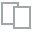
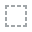
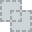
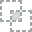
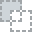
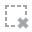
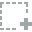
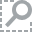
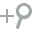
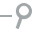
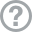
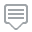
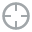
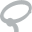
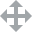
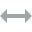
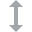
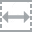
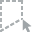
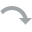
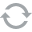
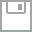
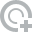
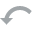
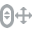
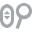
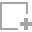
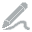
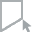
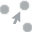
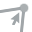
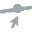

In [7]:
plot_correlation(data)

  0%|                                                                                          | 0/159 [00:00<…


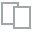
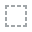
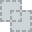
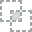
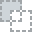
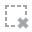
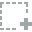
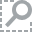
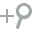
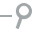
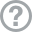
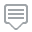
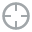
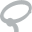
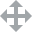
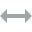
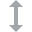
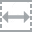
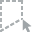
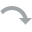
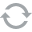
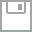
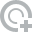
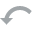
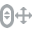
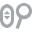
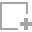
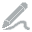
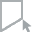
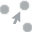
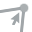
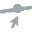

In [8]:
plot_missing(data)

In [9]:
data=data.dropna(subset=['Income'])
data.loc[(data['Income'].isnull() == True), 'Income'] = data['Income'].mean()

In [10]:
from scipy import stats

data = data[(np.abs(stats.zscore(data['Age'])) < 3)]   
data = data[(np.abs(stats.zscore(data['Income'])) < 3)] 
data.reset_index(inplace=True)                          
data = data.drop(columns=['index'])   

  0%|                                                                                           | 0/12 [00:00<…


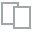
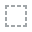
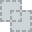
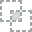
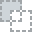
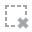
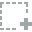
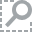
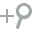
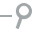
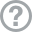
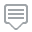
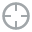
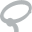
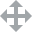
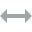
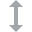
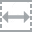
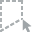
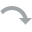
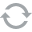
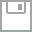
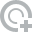
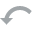
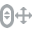
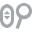
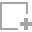
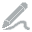
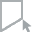
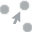
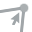
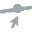

In [11]:
plot_correlation(data, x= 'Income', y= 'Spending')

In [14]:
cat_data = data[['Education', 'Marital_Status']]
num_data = data[['Age', 'Income','Spending', 'Children', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold','Days_Enrolled']]

In [15]:
cat_data = pd.get_dummies(cat_data)

In [16]:
scaler = StandardScaler()
num_data = pd.DataFrame(scaler.fit_transform(num_data), columns=num_data.columns)

In [17]:
scaled_data = pd.concat([num_data, cat_data], axis=1)

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4, init='k-means++', random_state=42,)

kmeans_labels = kmeans.fit_predict(scaled_data)

pd.Series(kmeans_labels).value_counts()

1    650
3    614
2    490
0    451
dtype: int64

In [29]:
cluster_data = data.copy()
cluster_data['clusters'] = kmeans_labels

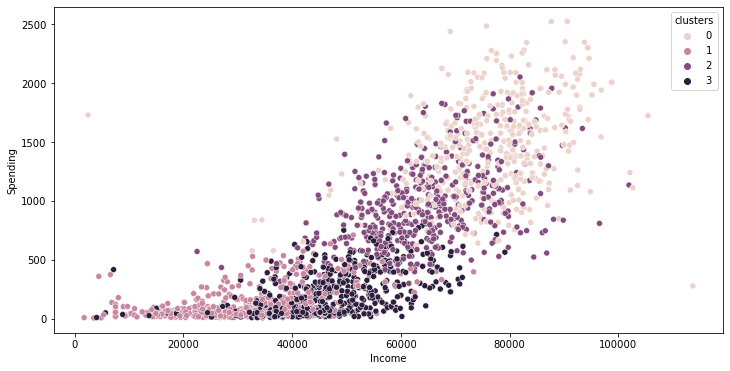

In [31]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(y ='Spending',x = 'Income', data = cluster_data, hue= 'clusters')

<AxesSubplot:xlabel='clusters', ylabel='Spending'>

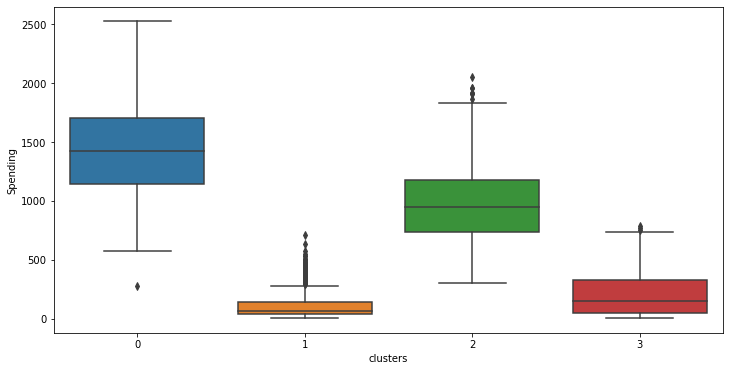

In [33]:
plt.figure(figsize=(12,6))

sns.boxplot(y = 'Spending', x='clusters', data=cluster_data)

<AxesSubplot:xlabel='clusters', ylabel='Income'>

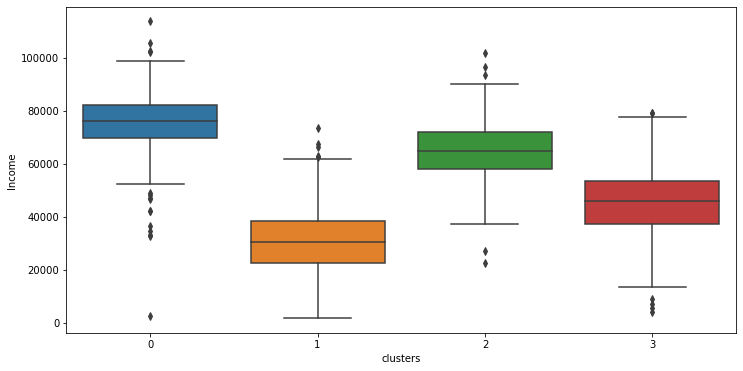

In [34]:
plt.figure(figsize=(12,6))

sns.boxplot(y = 'Income', x='clusters', data= cluster_data)

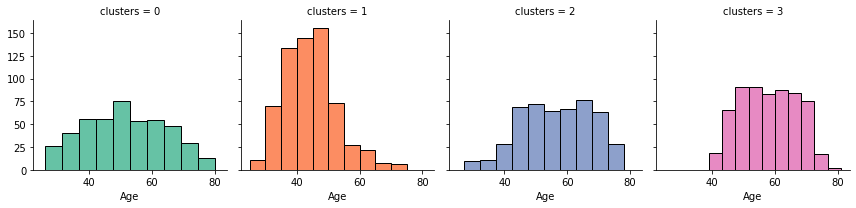

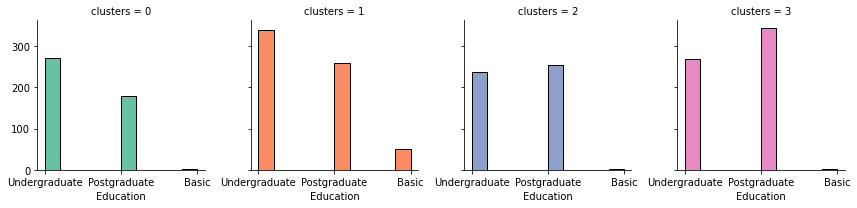

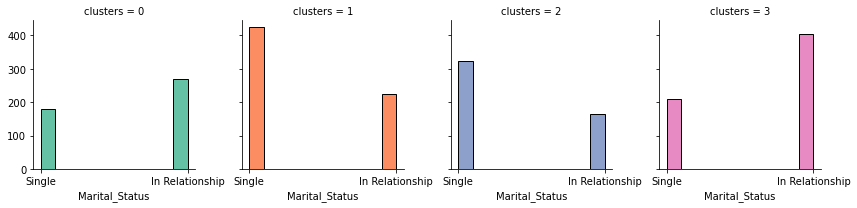

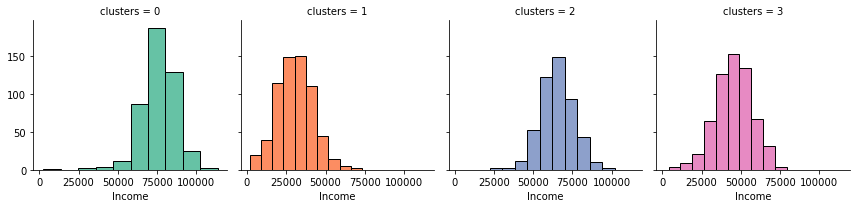

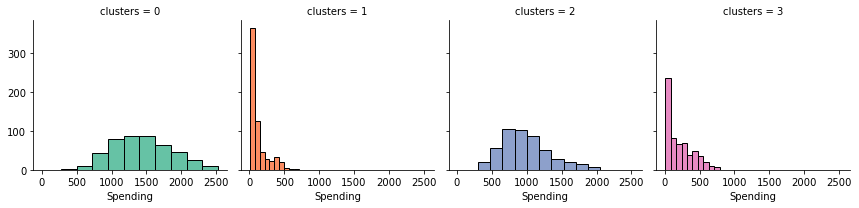

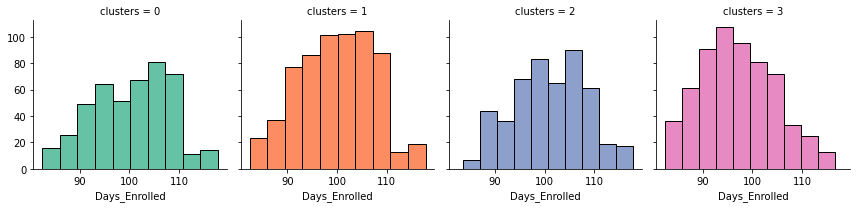

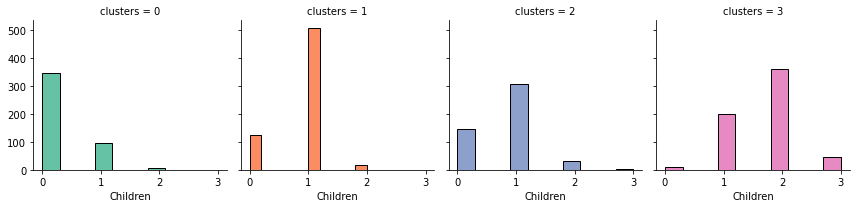

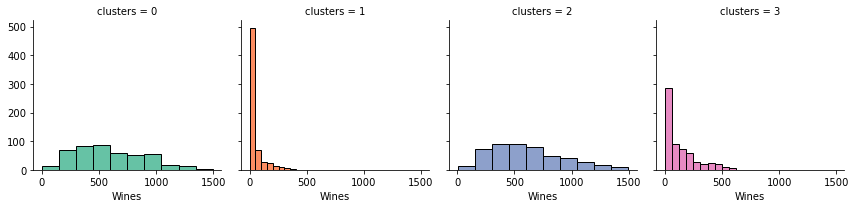

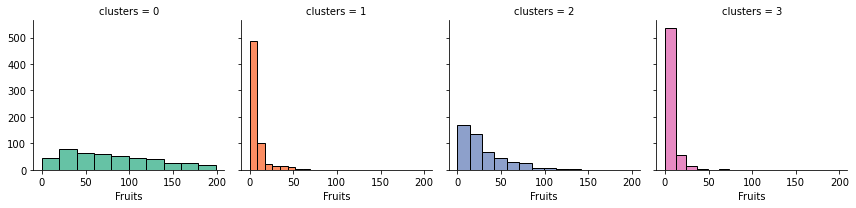

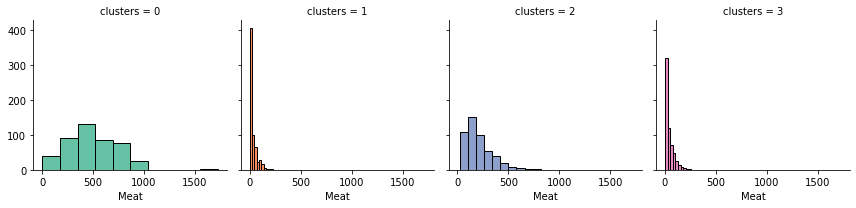

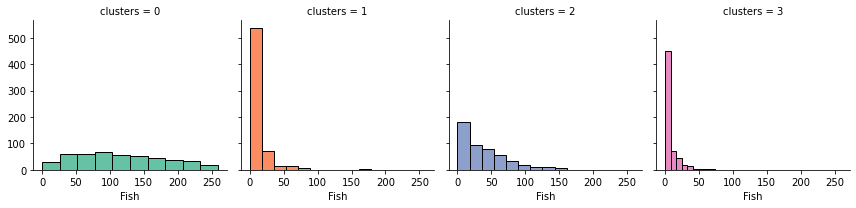

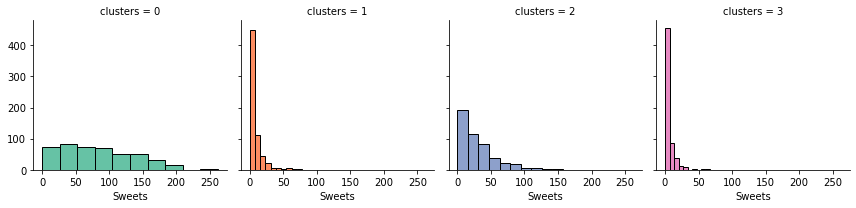

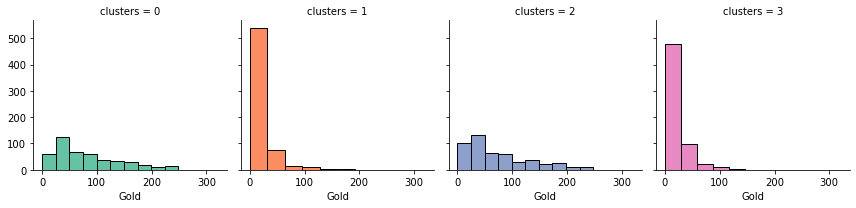

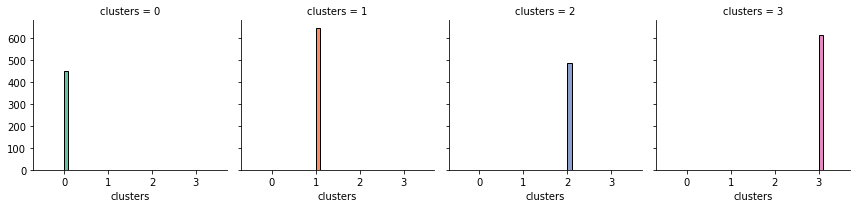

In [39]:

for i in cluster_data:
    g = sns.FacetGrid(cluster_data, col = "clusters", hue = "clusters", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    

In [52]:
clusters_incomes = cluster_data[['Income', 'Spending', 'clusters']]           # Select variables
clusters_incomes['group'] = clusters_incomes['clusters']                     # Create new variable
clusters_incomes['group'] = clusters_incomes['group'].astype(str)           # Change data type 

# Rename values
clusters_incomes['group'] = clusters_incomes['group'].str.replace('0', 'Elite Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('1', 'Economical Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('2', 'Good Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('3', 'Cheap Customers')

C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


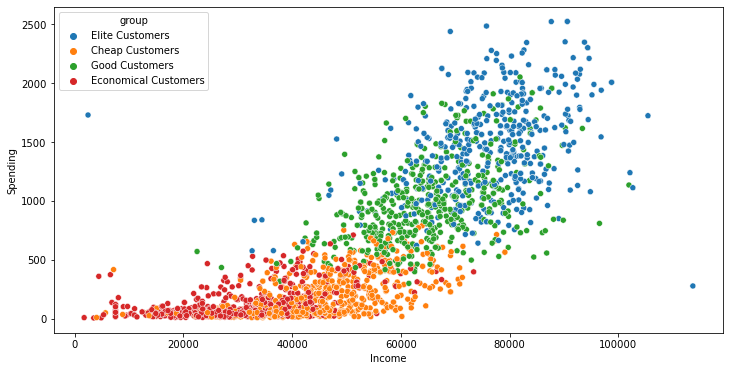

In [53]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(y ='Spending',x = 'Income', data = clusters_incomes, hue= 'group')